# Vertigo - Up/down movement
This is an example of analysis of a motion capture from a Vertigo2 unit which is moved up and down by hand.

We will use the Vertigo motion capture file to gain some further insight into the dynamics of the device during the experiment.

In [1]:
from motion import MotionCapture
import matplotlib.pyplot as plt
from scipy import signal, integrate

Now we need to create the MotionCapture object by loading the log file.

In [2]:
filename = 'jamie-up-down-movement.csv'
capture = MotionCapture(filename)
wf = capture.linear_accel_world

In [3]:
fs = 1.0 / ((wf.timestamp[1] - wf.timestamp[0]).total_seconds())
print(f"Identified sample frequency as {fs}Hz")

Identified sample frequency as 200.0Hz


We need to integrate twice to derive velocity from acceleration, and then displacement from velocity. We now design a digital filter to remove the DC component at each stage of the integration, and numerically integrate.

In [10]:
flt = signal.butter(N=2, Wn=0.3, btype='highpass', output='sos', fs=fs)
vz = integrate.cumtrapz(y=wf.az, dx=1/fs, initial=0)
vz = signal.sosfilt(flt, vz)
sz = integrate.cumtrapz(y=vz, dx=1/fs, initial=0)
sz = signal.sosfilt(flt, sz)

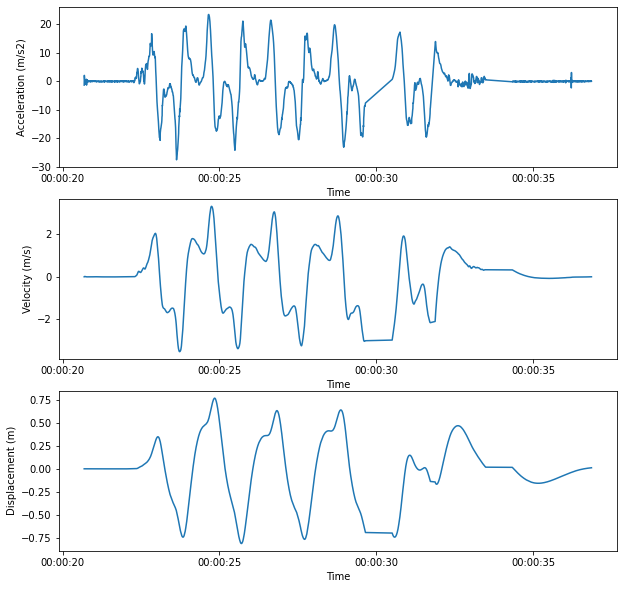

In [11]:
fig = plt.figure(figsize=(10,10))
plt.subplot(311)
plt.plot(wf.timestamp, wf.az)
plt.xlabel('Time')
plt.ylabel('Acceleration (m/s2)')
plt.subplot(312)
plt.plot(wf.timestamp, vz)
plt.xlabel('Time')
plt.ylabel('Velocity (m/s)')
plt.subplot(313)
plt.plot(wf.timestamp, sz)
plt.xlabel('Time')
plt.ylabel('Displacement (m)')
plt.show()